In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import floor
from sklearn.cluster import KMeans
from credible_ball import calculate_credible_ball
from plot import plot_credibleball
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.cluster import contingency_matrix

# Simulated Examples

In [2]:
def generate_data(n, sigma):
    X = []
    for _ in range(n):
        x = 0
        for j in range(1, 5):
            x += np.random.multivariate_normal(mean = [2 * (-1) ** floor((j - 1) / 2), 2 * (-1) ** (j - 1)],
                                               cov = np.array([[sigma[0] ** 2, 0], [0, sigma[1] ** 2]]))
        X.append(x)
    return np.array(X)


In [3]:
n = 200
X1 = generate_data(n, [1, 1])    #dataset1
X2 = generate_data(n, [0.5, 1.5])    #dataset2

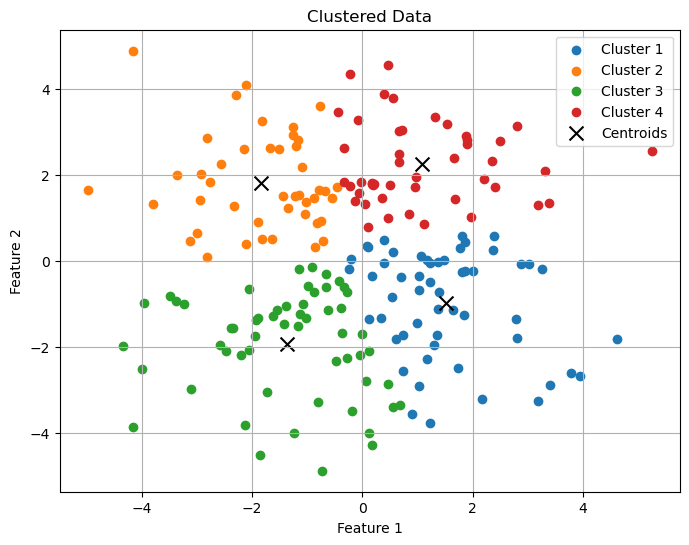

In [12]:
# Perform clustering (KMeans with 4 clusters)
# Fit the model to the data and predict the cluster labels for the data points in X1
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X1)
labels = kmeans.labels_

# Plot the data with cluster colors
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = X1[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label = f'Cluster {i + 1}')
    

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'x', s = 100, label = 'Centroids')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

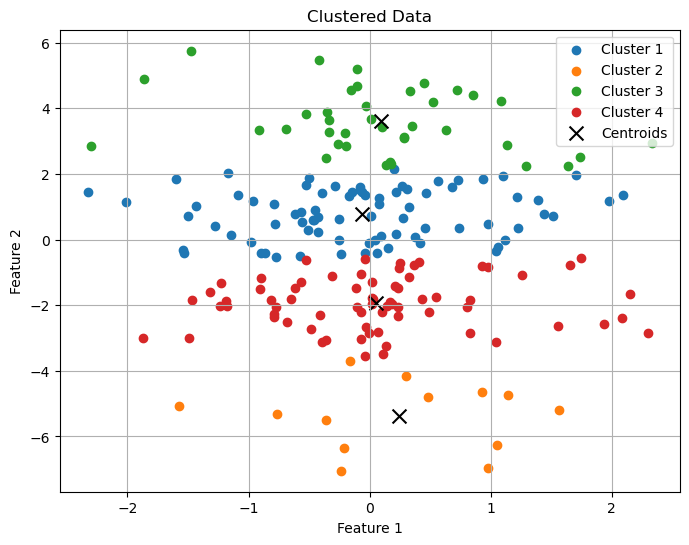

In [15]:
# Perform clustering (KMeans with 4 clusters)
# Fit the model to the data and predict the cluster labels for the data points in X2
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X2)
labels = kmeans.labels_

# Plot the data with cluster colors
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = X2[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label = f'Cluster {i + 1}')
    

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'x', s = 100, label = 'Centroids')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

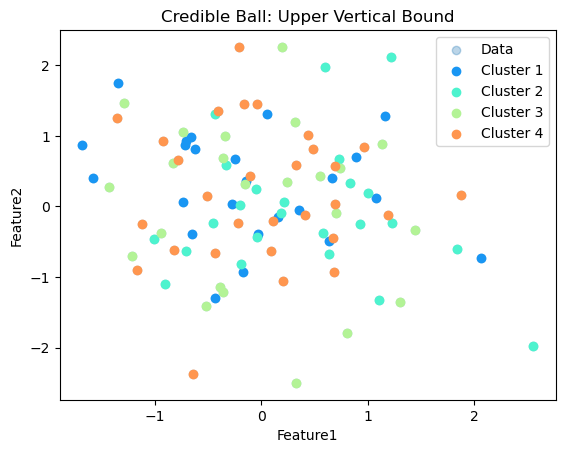

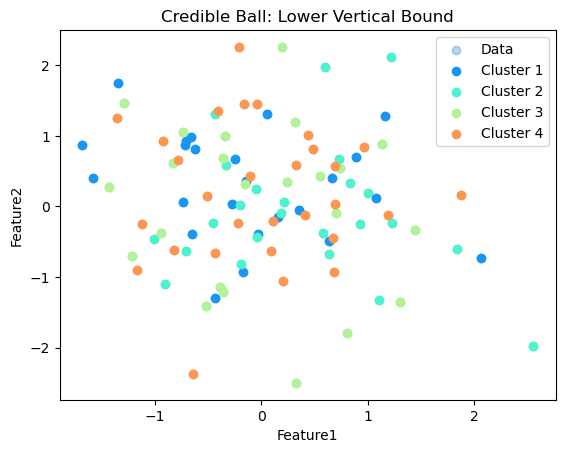

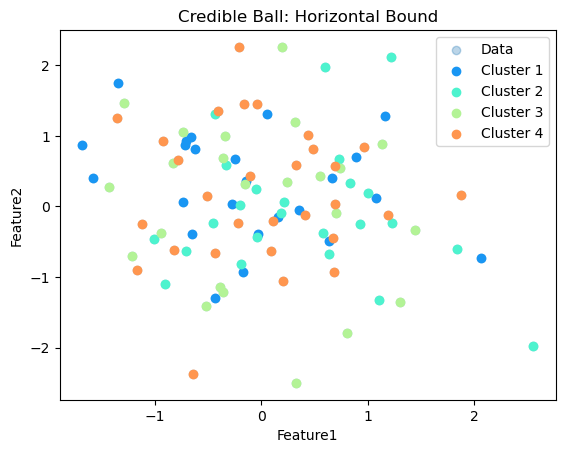

In [7]:
n_samples = 100
sigma = [0.5, 0.5]
data = generate_data(n_samples, sigma)

# Simuler un clustering optimal et des échantillons de clustering
n_clusters = 4
c_star = np.random.randint(1, n_clusters + 1, n_samples)
cls_draw = np.random.randint(1, n_clusters + 1, size=(50, n_samples))  # 50 échantillons de clustering

# Calculer la Credible Ball
credible_ball = calculate_credible_ball(c_star, cls_draw, c_dist="VI", alpha=0.05)

# Tracer la Credible Ball
data_df = pd.DataFrame(data, columns=["Feature1", "Feature2"])
plot_credibleball(credible_ball, data_df)

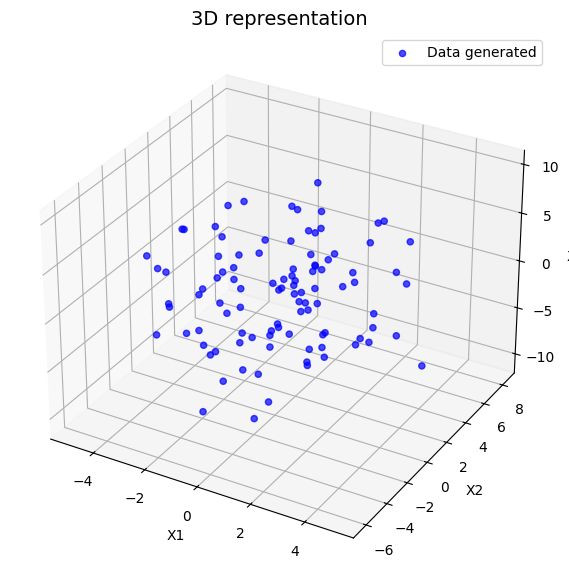

In [4]:
# Code for Théo concerning k-means 

def generate_data_theo(n, sigma):
    X = []
    for _ in range(n):
        x = 0
        for j in range(1, 5):
            x += np.random.multivariate_normal(mean = [2 * (-1) ** floor((j - 1) / 2), 2 * (-1) ** (j - 1), 2 * (-1) ** (j - 1)],
                                               cov = np.array([[sigma[0] ** 2, 0, 0], [0, sigma[1] ** 2, 0], [0, 0, sigma[2] ** 2]]))
        X.append(x)
    return np.array(X)

X = generate_data_theo(n = 10 ** 2, sigma = [1, 1.5, 2])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', alpha=0.7, label='Data generated')
ax.set_title("3D representation", fontsize=14)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")

ax.legend()
plt.show()

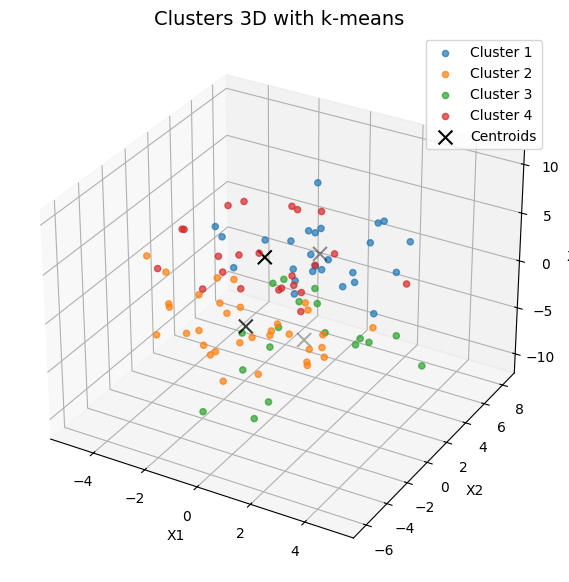

In [13]:
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    cluster_points = X[labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               label=f"Cluster {cluster + 1}", alpha=0.7)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           s=100, c='black', marker='x', label='Centroids')

ax.set_title("Clusters 3D with k-means", fontsize=14)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.legend()
plt.show()

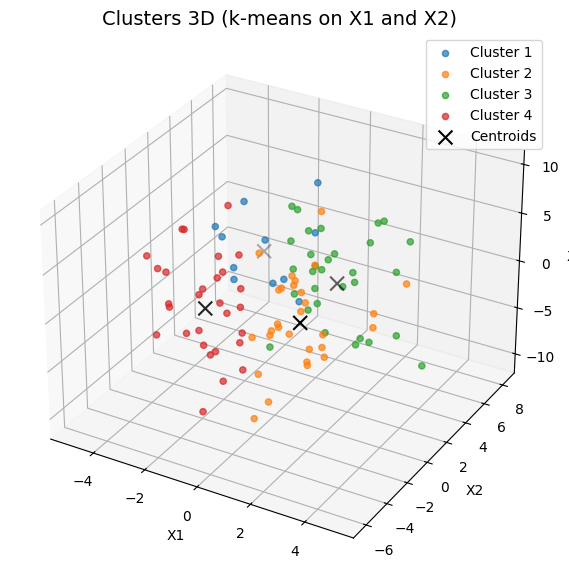

In [14]:
X2 = X[:, :2]

n_clusters = 4
kmeans2 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans2.fit(X2)
labels2 = kmeans2.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    cluster_points = X[labels2 == cluster]  
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {cluster + 1}", alpha=0.7)

centroids2 = kmeans2.cluster_centers_
ax.scatter(centroids2[:, 0], centroids2[:, 1], np.zeros(centroids2.shape[0]), 
           s=100, c='black', marker='x', label='Centroids')

ax.set_title("Clusters 3D (k-means on X1 and X2)", fontsize=14)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.legend()
plt.show()

In [16]:
contingency = contingency_matrix(labels, labels2)
row_ind, col_ind = linear_sum_assignment(-contingency)  

aligned_labels_2d = np.zeros_like(labels2)
for i, j in zip(row_ind, col_ind):
    aligned_labels_2d[labels2 == j] = i

accuracy = np.mean(aligned_labels_2d == labels)
print(f"Taux de correspondance entre les labels (2D vs 3D) : {accuracy * 100:.2f}%")

Taux de correspondance entre les labels (2D vs 3D) : 48.00%
